<a href="https://colab.research.google.com/github/PanasRojpattanadecha/python_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป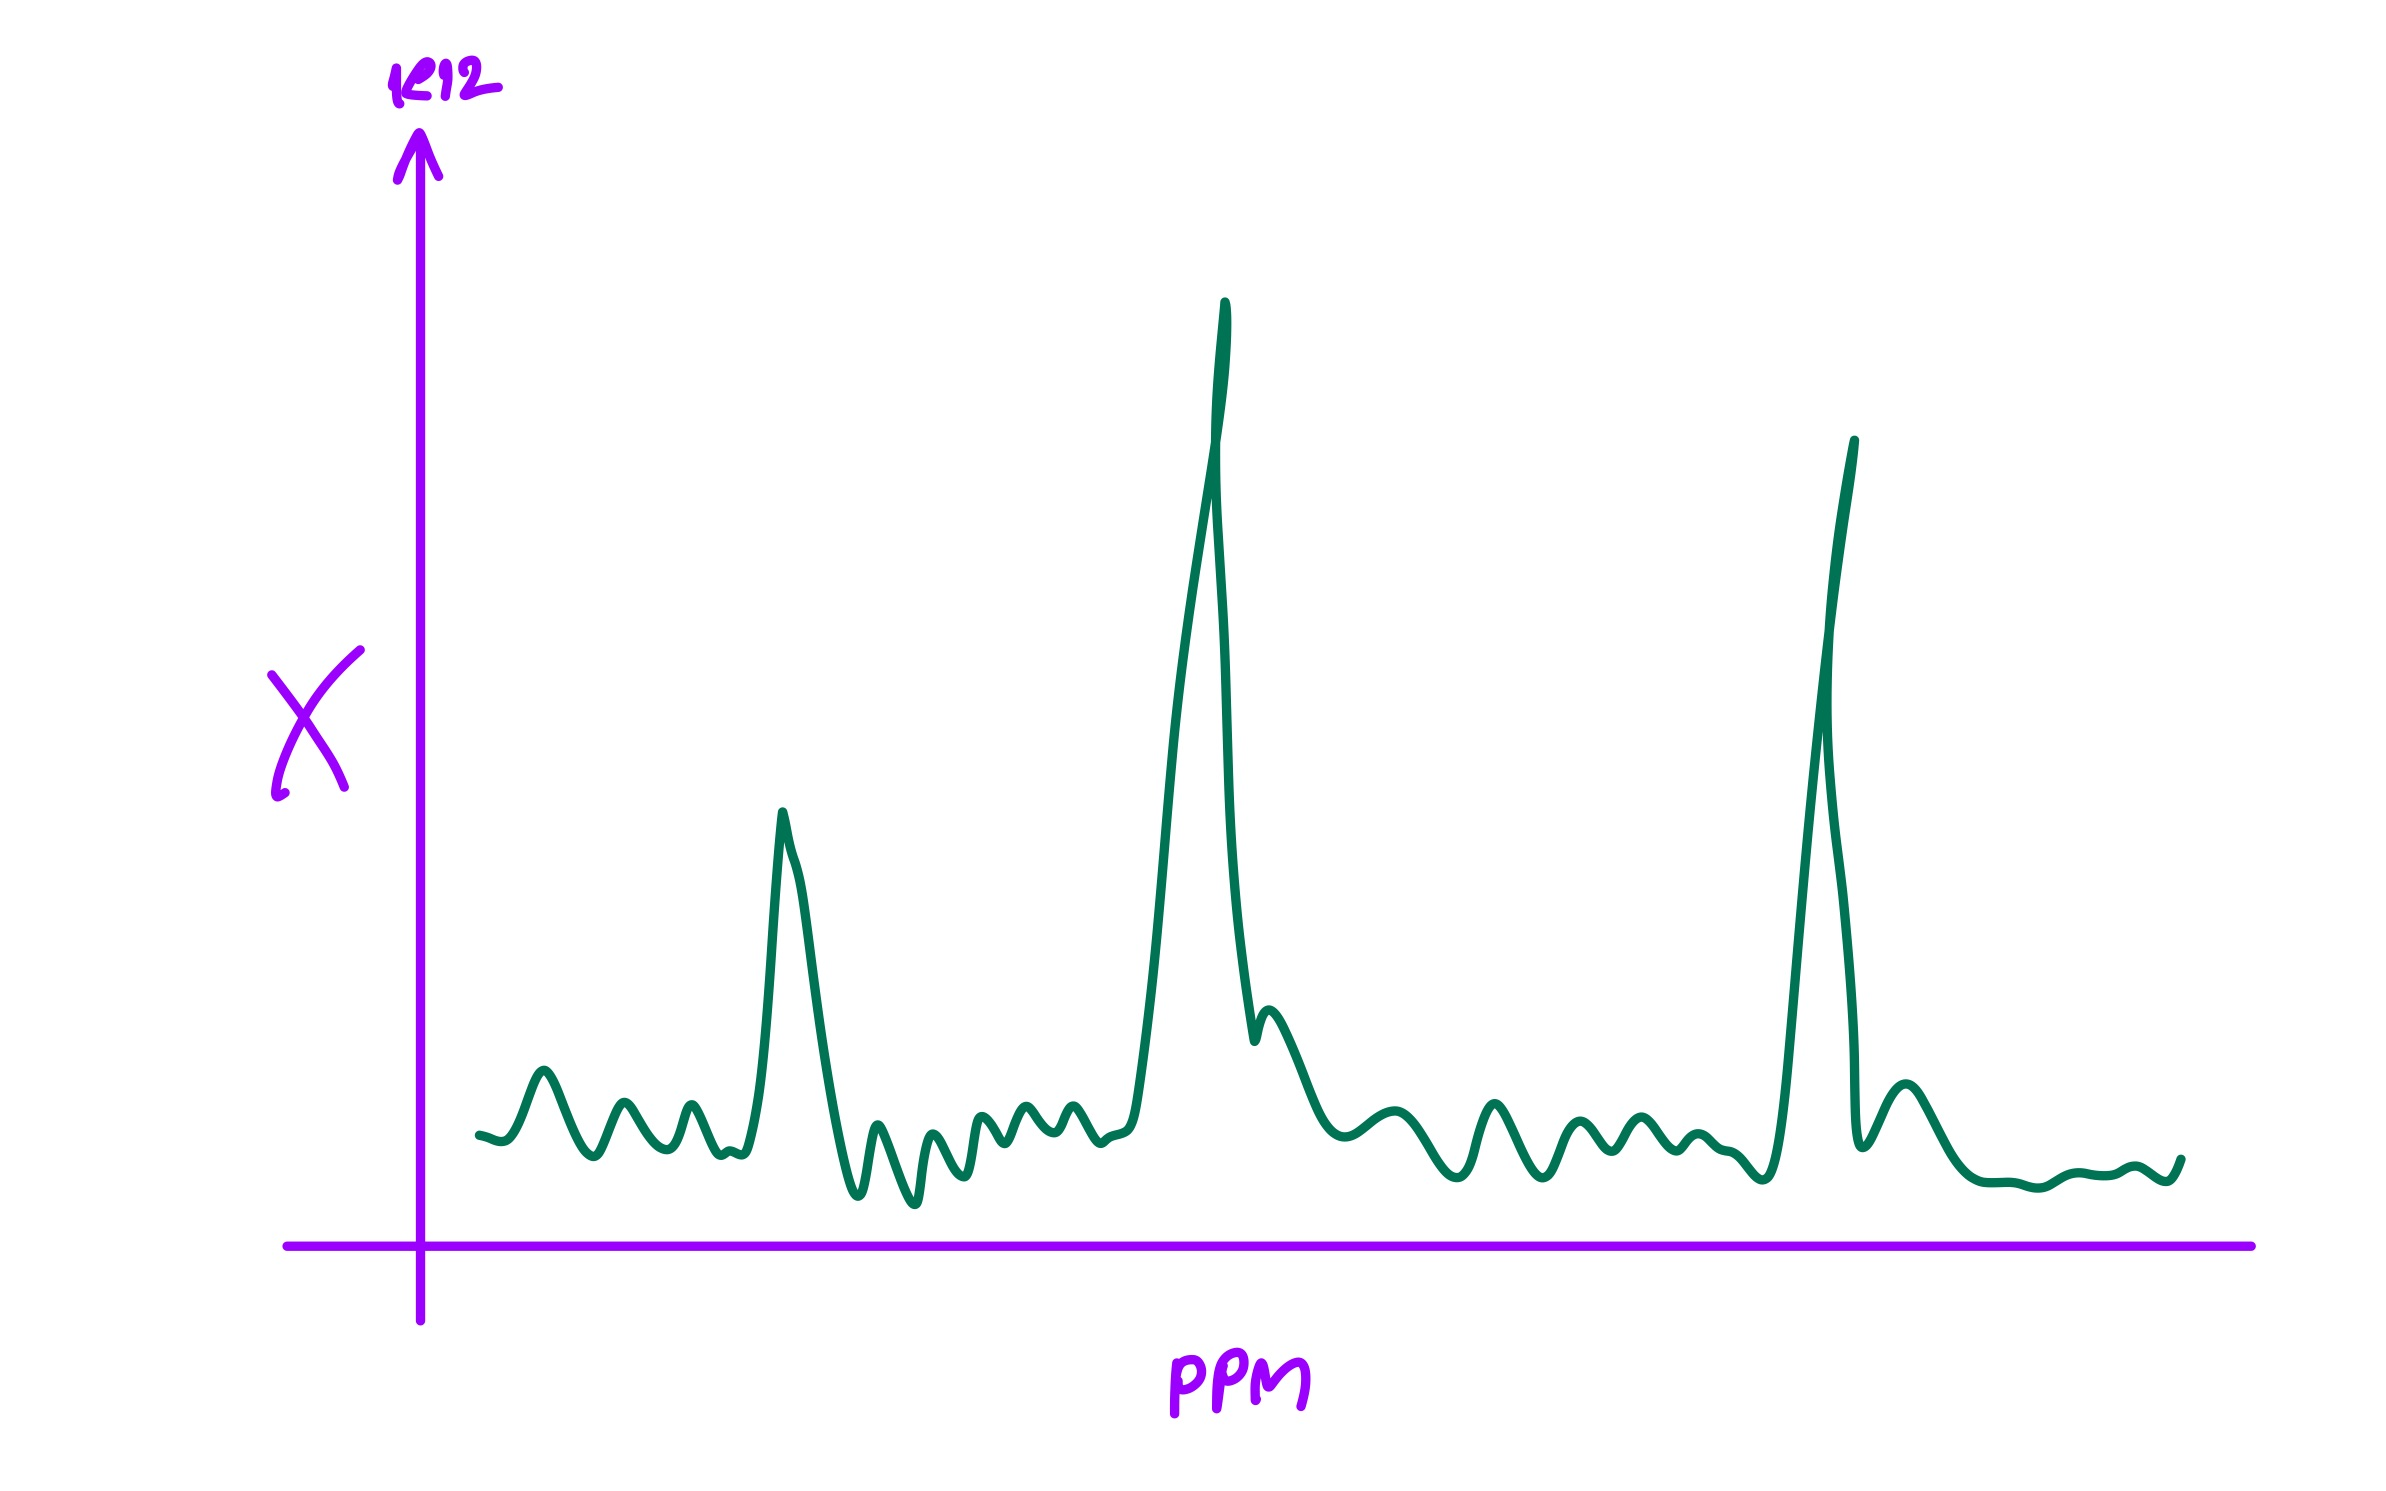

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
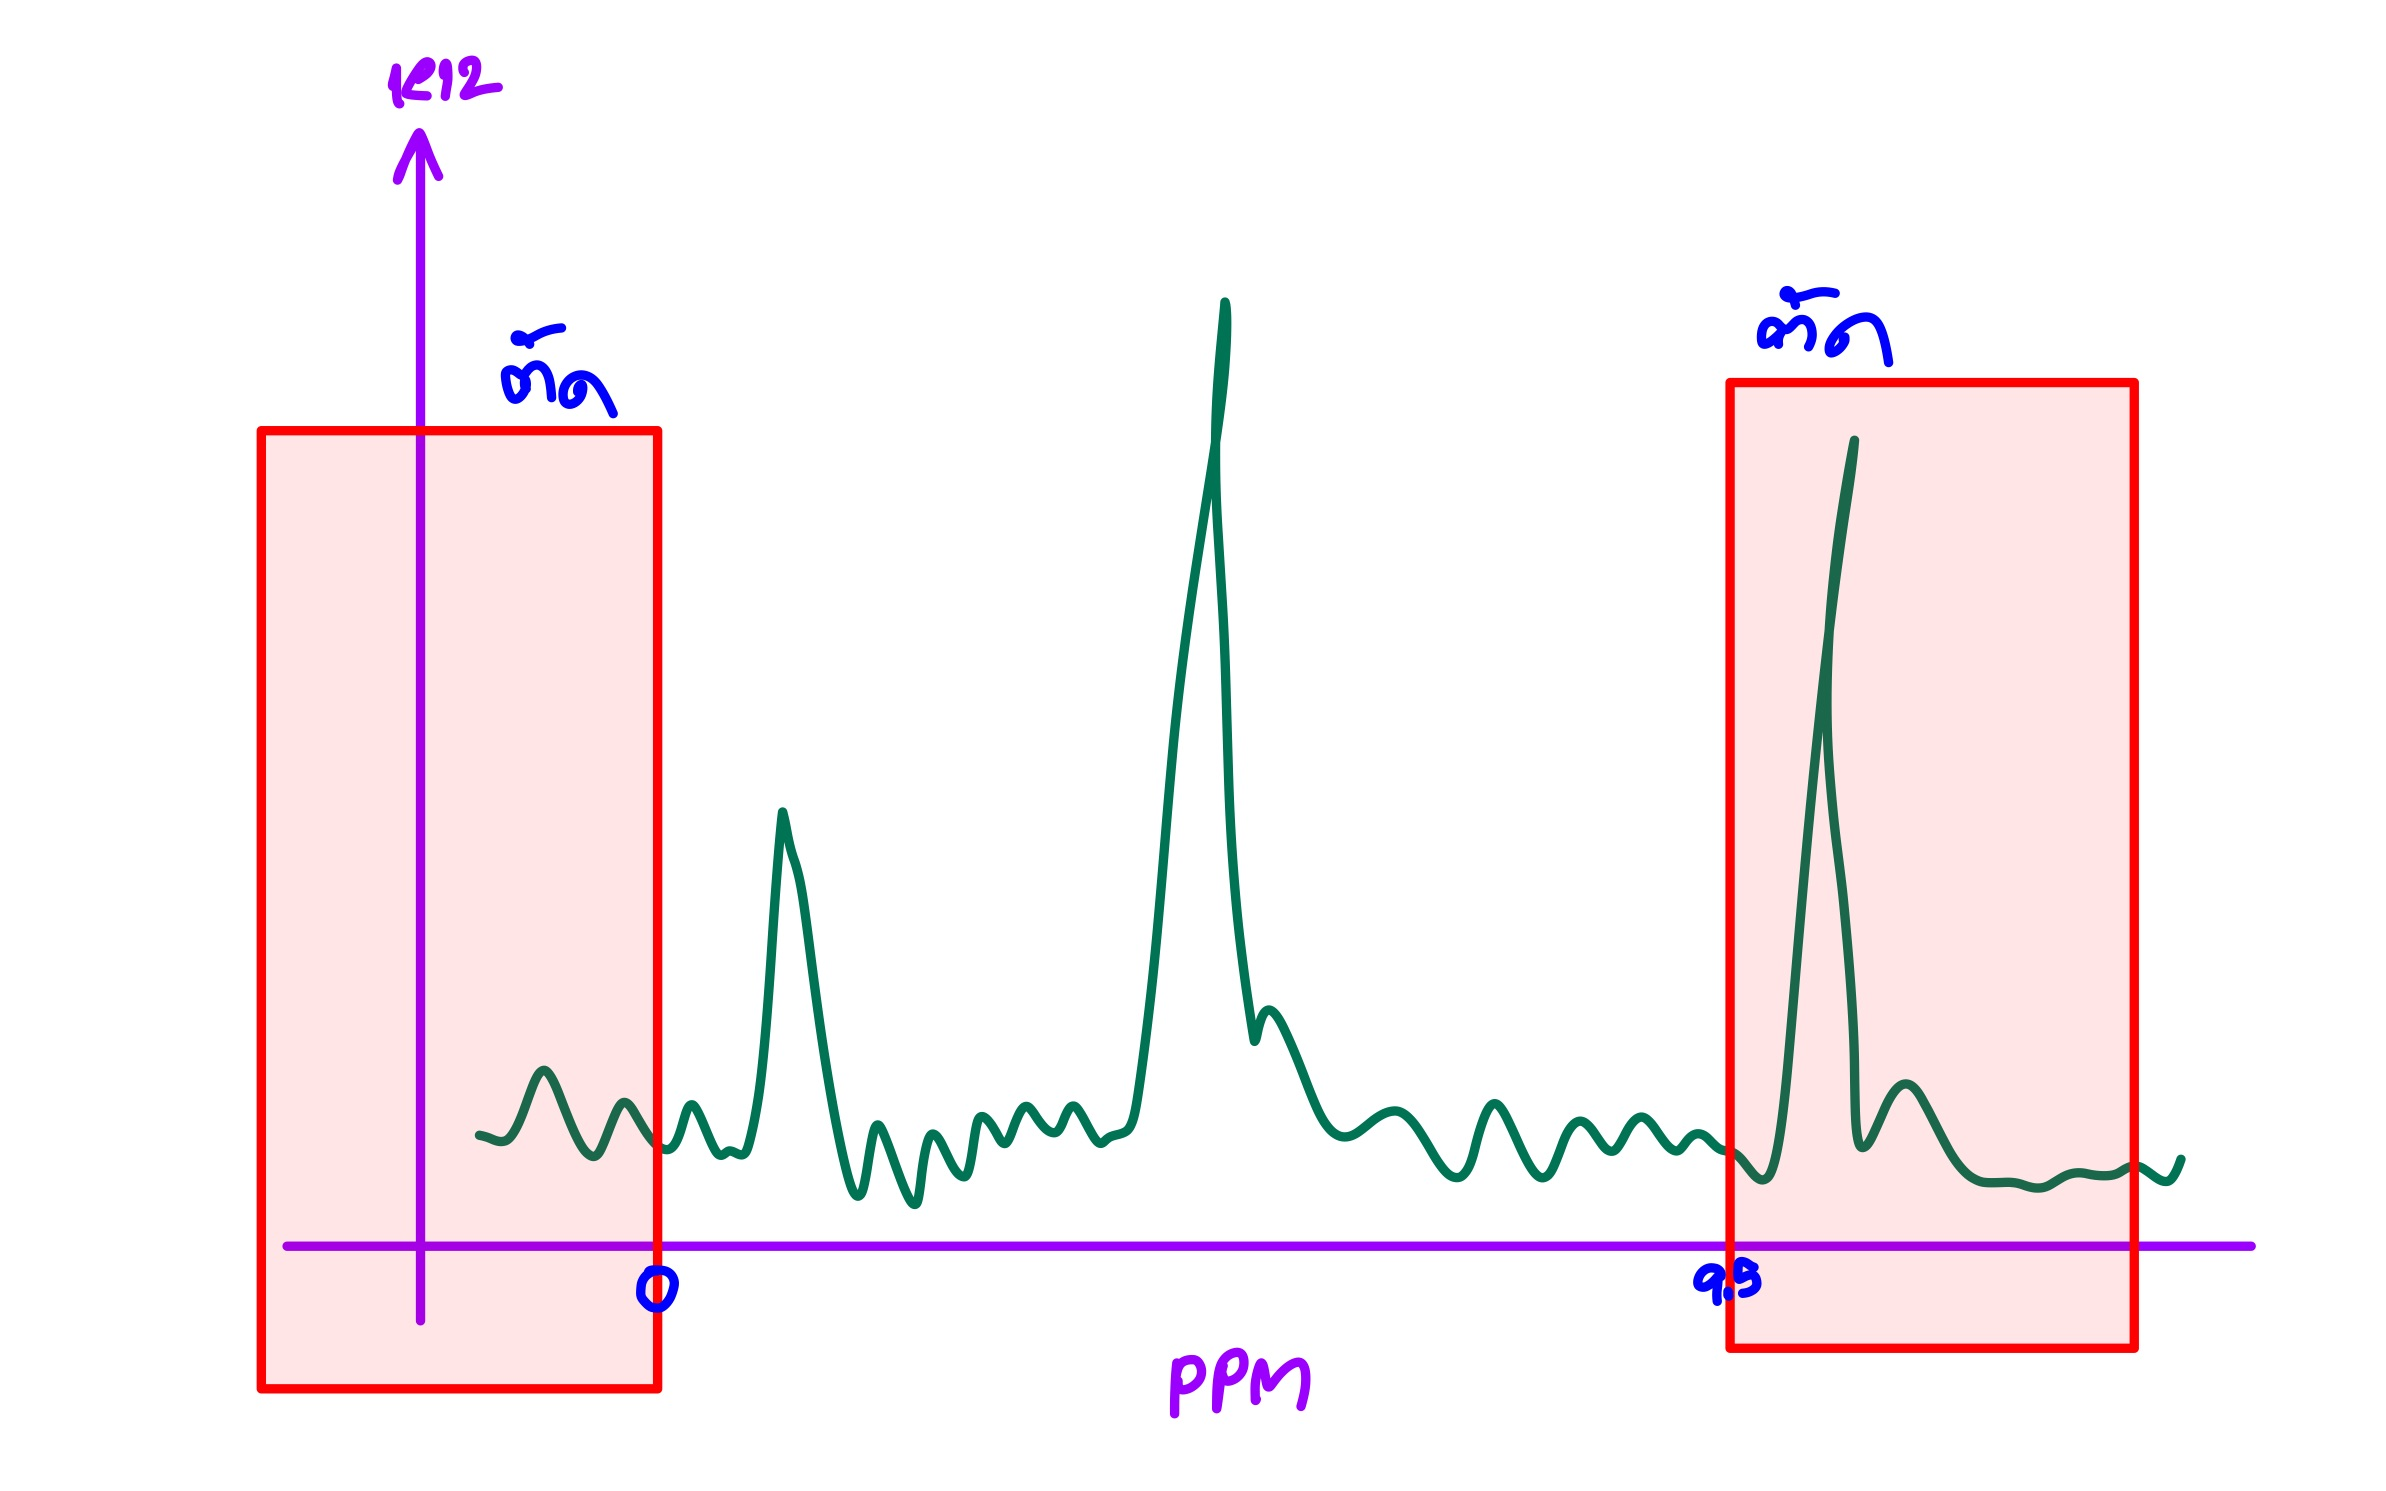

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
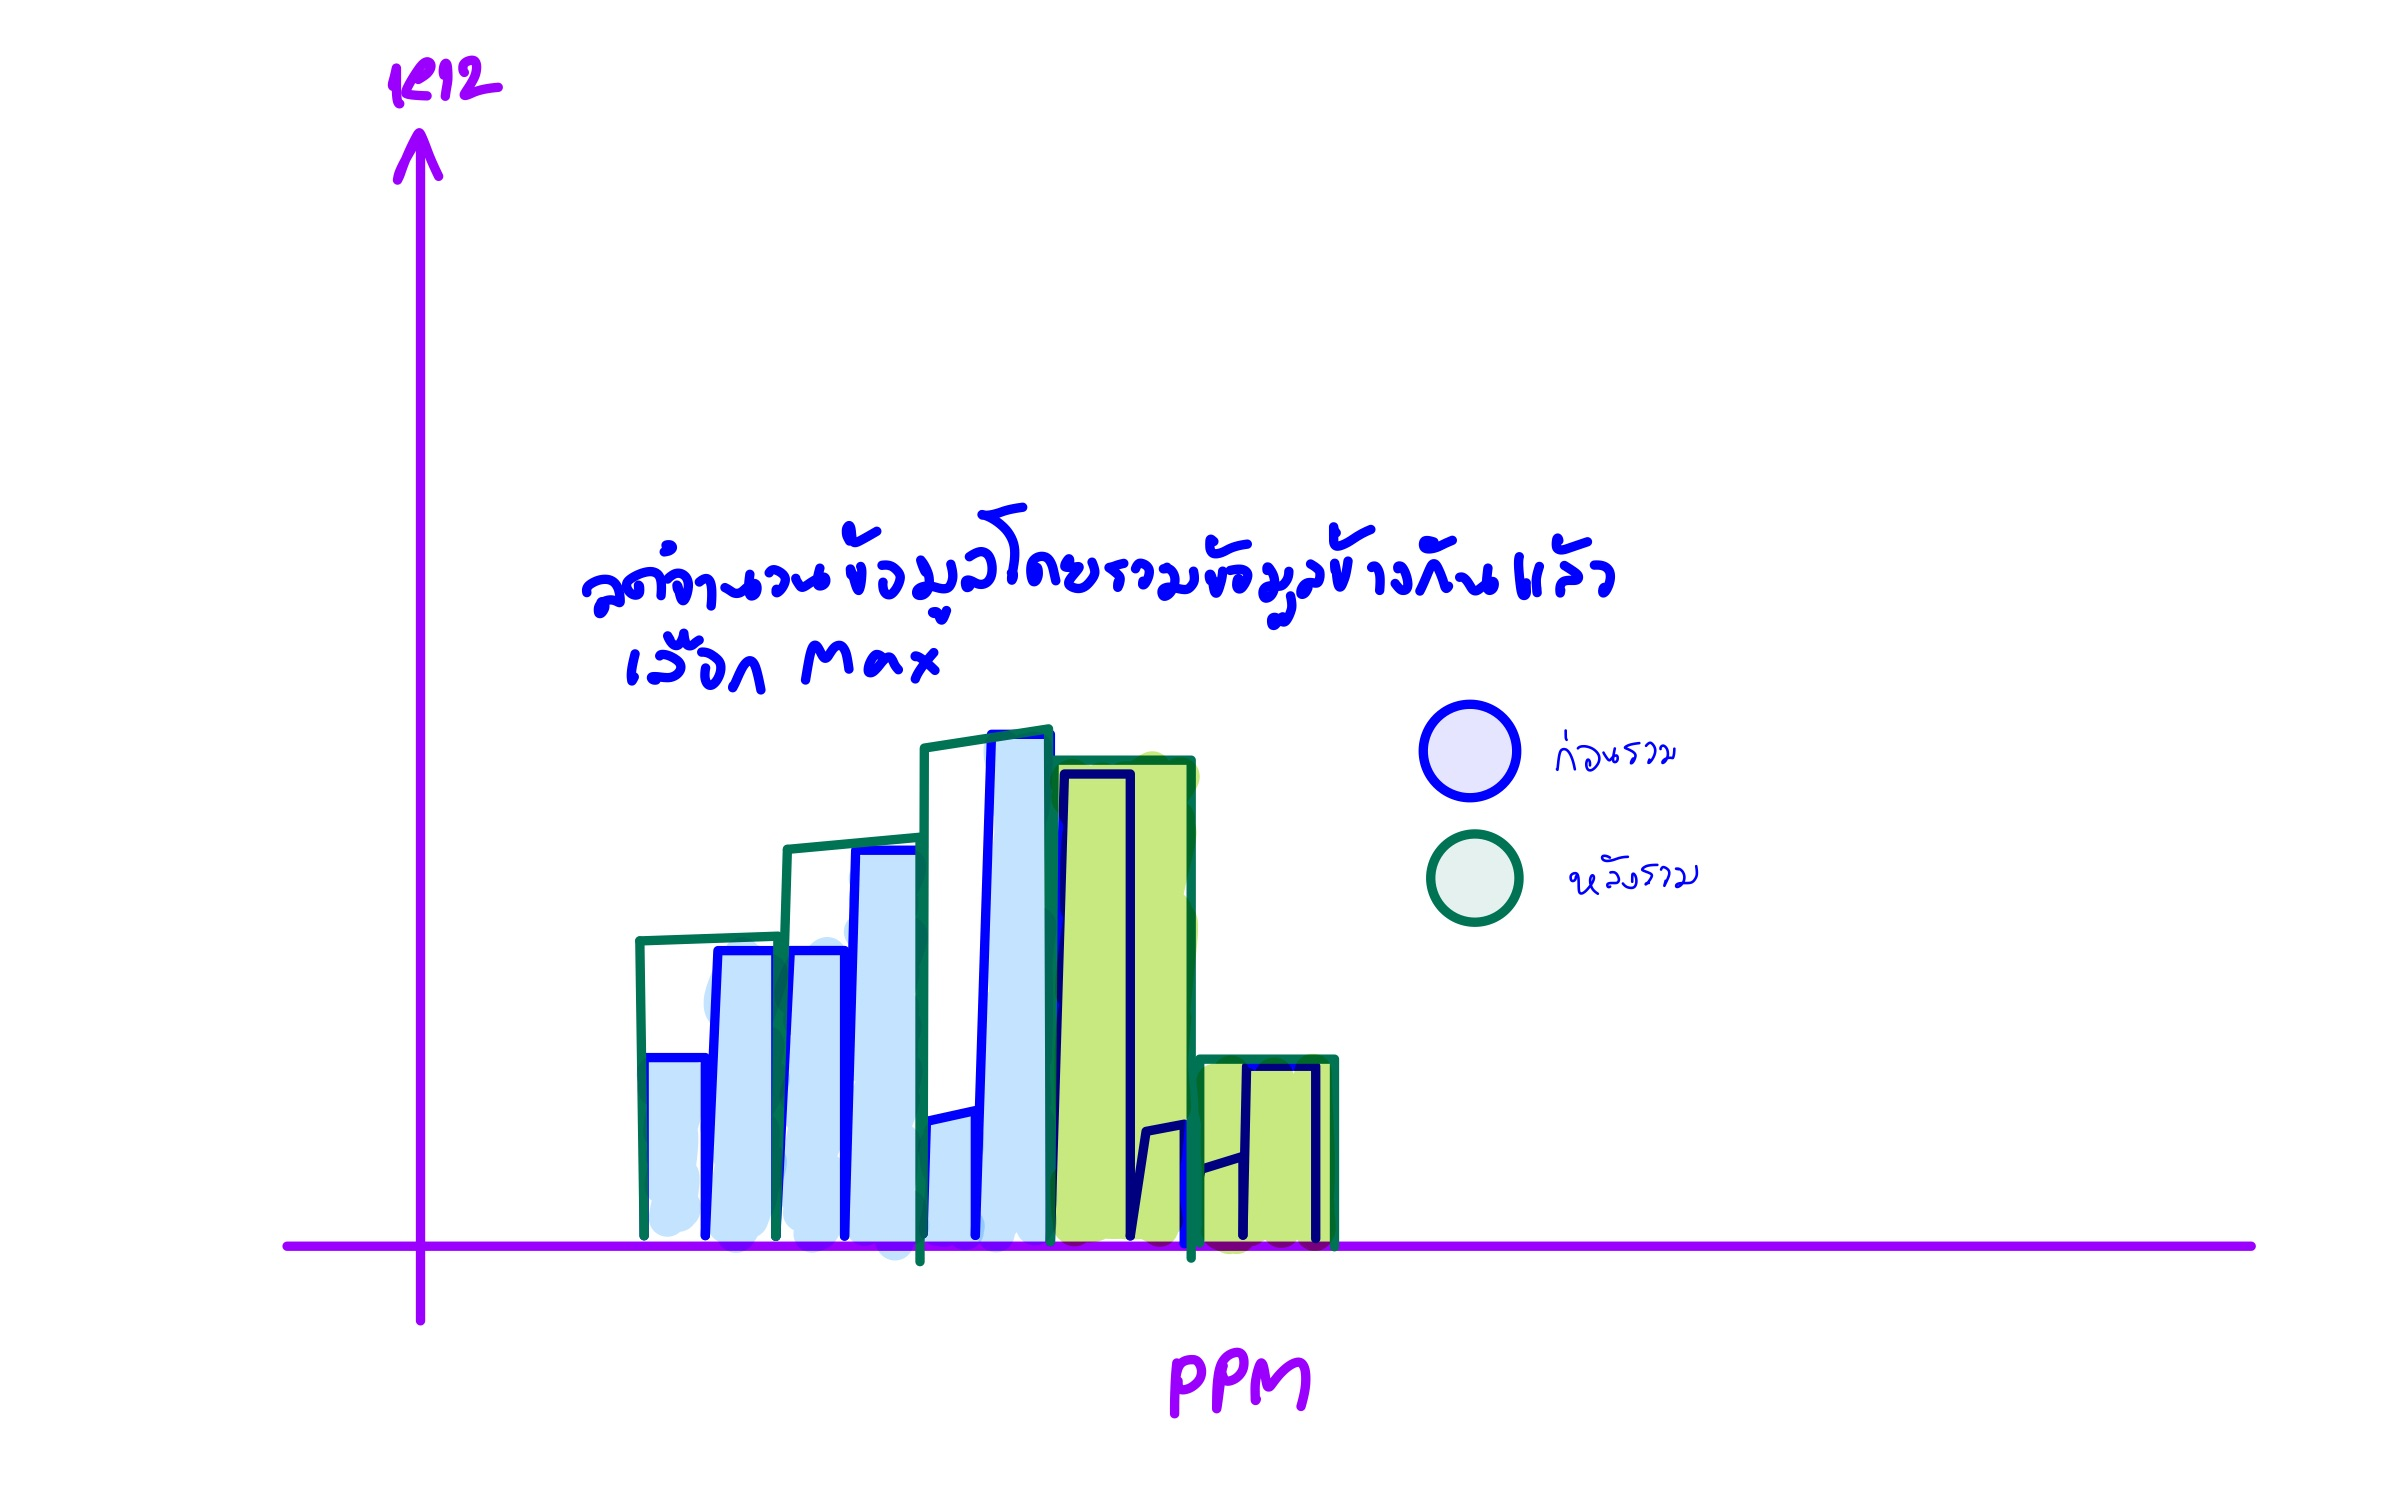

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

# **preprocess ข้อมูลตามคำแนะนำข้างบน**

In [149]:
import pandas as pd
import numpy as np
import os

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
path = '/content/drive/My Drive/Final Exam/Xnn_ppm.pickle'

In [172]:
data = pd.read_pickle(path)

# Assuming your pickle file contains two arrays: one for X and one for ppm
X = data[0]
ppm = data[1]

In [174]:
print(X.shape)
print(ppm.shape)

(51, 65536)
(65536,)


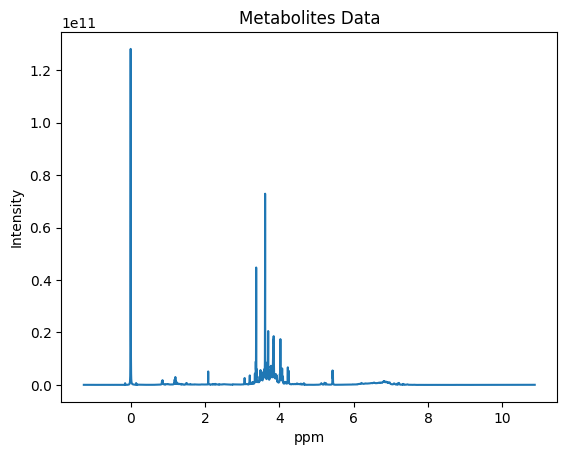

In [154]:
import matplotlib.pyplot as plt

plt.plot(ppm, X[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Metabolites Data')
plt.show()

In [155]:
# กำหนดช่วง ppm
ppm_range = (ppm > 0) & (ppm < 9.5)

# ตัดข้อมูล
X_filtered = X[:, ppm_range]
ppm_filtered = ppm[ppm_range]

In [156]:
print(X_filtered.shape)
print(ppm_filtered.shape)

(51, 51318)
(51318,)


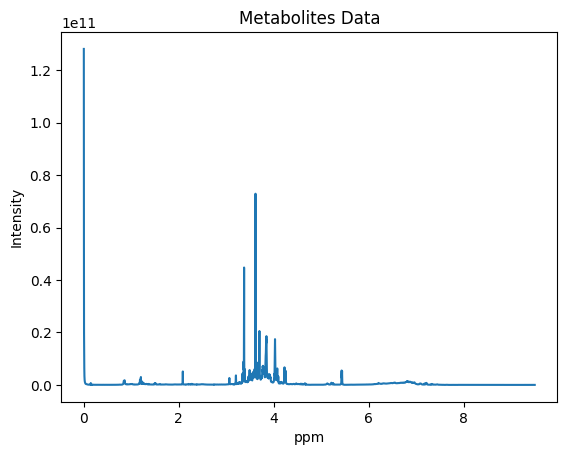

In [157]:
plt.plot(ppm_filtered, X_filtered[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Metabolites Data')
plt.show()

In [158]:
num_intervals = 400

In [159]:
step_size = X_filtered.shape[1] // num_intervals

In [160]:
X_quantized = np.zeros((X_filtered.shape[0], num_intervals))

In [161]:
# ทำการ quantize โดยหาค่า max ของ X ในแต่ละช่วง
for i in range(num_intervals):
    start_index = i * step_size
    end_index = (i + 1) * step_size
    X_quantized[:, i] = np.max(X_filtered[:, start_index:end_index], axis=1)

print(X_quantized.shape)

(51, 400)


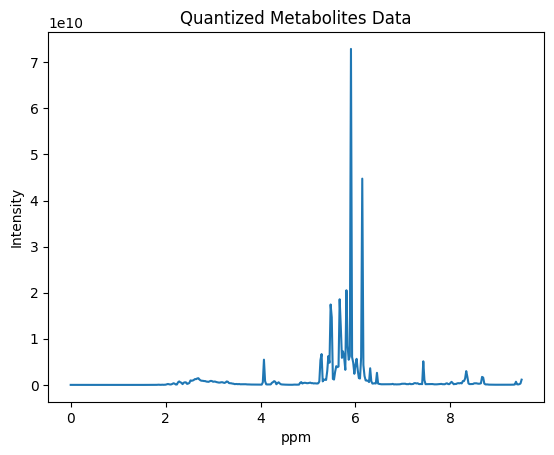

In [162]:
plt.plot(np.linspace(ppm_filtered.min(), ppm_filtered.max(), num_intervals), X_quantized[0])
plt.xlabel('ppm')
plt.ylabel('Intensity')
plt.title('Quantized Metabolites Data')
plt.show()

# **ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้**

In [163]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# ทำ PCA ลดมิติข้อมูลเหลือ 3 มิติ
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# **visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น**

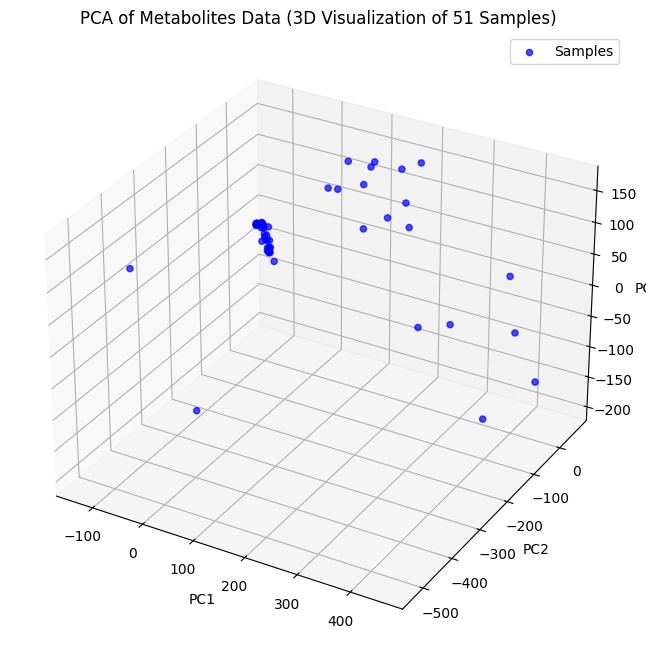

In [164]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c='blue', label='Samples', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA of Metabolites Data (3D Visualization of 51 Samples)')
plt.legend()
plt.grid(True)
plt.show()


# **ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี**

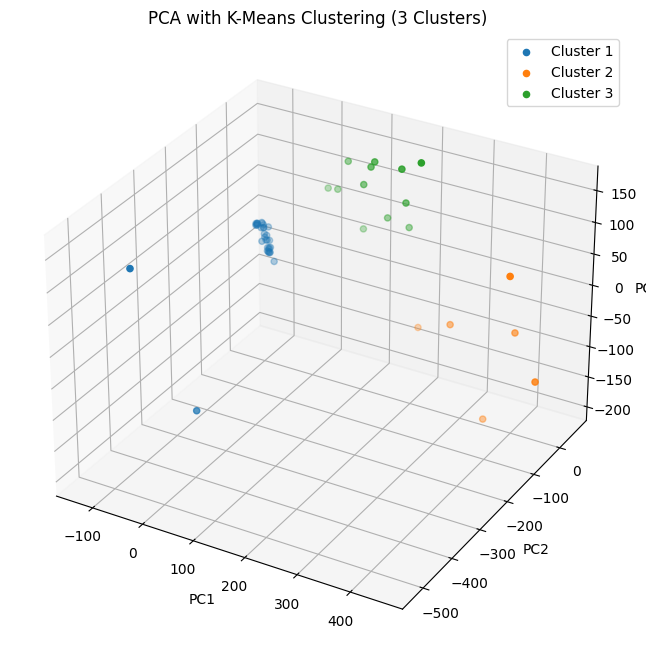

จากการวิเคราะห์ข้อมูล Data มีทั้งหมด 3 กลุ่ม


In [175]:
from sklearn.cluster import KMeans
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(X_pca_3d)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(k):
  ax.scatter(X_pca_3d[cluster_labels == i, 0], X_pca_3d[cluster_labels == i, 1], X_pca_3d[cluster_labels == i, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title(f'PCA with K-Means Clustering ({num_clusters} Clusters)')
plt.legend()
plt.grid(True)
plt.show()
print("จากการวิเคราะห์ข้อมูล Data มีทั้งหมด 3 กลุ่ม")

# **สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน**

In [176]:
df_pca_clusters = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_clusters['Cluster'] = clusters

print(df_pca_clusters)

           PC1         PC2         PC3  Cluster
0   -86.115782   -2.496138  -36.543816        0
1   -93.922674    3.692194  -32.247098        0
2  -129.827242   27.876268   -8.893485        0
3  -130.621579   25.298056   -8.480207        0
4   -94.452632  -14.719793  -14.771597        0
5   -93.094033    1.547216  -36.529431        0
6  -128.909716   26.540140   -8.895364        0
7  -104.695752   10.909950  -14.330652        0
8   -74.338974   -6.828910  -46.697057        0
9  -100.785435   13.971277  -25.234130        0
10 -126.859007   22.892232   -9.496711        0
11 -105.940880   26.984132   -9.431798        0
12 -102.764031   13.117746  -25.083288        0
13 -106.645704    3.254109   -1.902427        0
14 -128.824679   27.406968   -8.980591        0
15  -95.558628    9.984514  -42.856550        0
16 -116.587656   28.132045  -13.349928        0
17  -87.063304    0.688706  -37.222650        0
18 -124.389937   36.760177  -10.975154        0
19 -119.088717   32.760018  -15.411920  

In [178]:
df_pca_clusters = pd.DataFrame(X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_clusters['Cluster'] = clusters

cluster_0 = df_pca_clusters[df_pca_clusters['Cluster'] == 0]
cluster_1 = df_pca_clusters[df_pca_clusters['Cluster'] == 1]
cluster_2 = df_pca_clusters[df_pca_clusters['Cluster'] == 2]

print("ตาราง Cluster 0:")
print(cluster_0)
print("\nตาราง Cluster 1:")
print(cluster_1)
print("\nตาราง Cluster 2:")
print(cluster_2)


ตาราง Cluster 0:
           PC1         PC2         PC3  Cluster
0   -86.115782   -2.496138  -36.543816        0
1   -93.922674    3.692194  -32.247098        0
2  -129.827242   27.876268   -8.893485        0
3  -130.621579   25.298056   -8.480207        0
4   -94.452632  -14.719793  -14.771597        0
5   -93.094033    1.547216  -36.529431        0
6  -128.909716   26.540140   -8.895364        0
7  -104.695752   10.909950  -14.330652        0
8   -74.338974   -6.828910  -46.697057        0
9  -100.785435   13.971277  -25.234130        0
10 -126.859007   22.892232   -9.496711        0
11 -105.940880   26.984132   -9.431798        0
12 -102.764031   13.117746  -25.083288        0
13 -106.645704    3.254109   -1.902427        0
14 -128.824679   27.406968   -8.980591        0
15  -95.558628    9.984514  -42.856550        0
16 -116.587656   28.132045  -13.349928        0
17  -87.063304    0.688706  -37.222650        0
18 -124.389937   36.760177  -10.975154        0
19 -119.088717   32.760